<a href="https://colab.research.google.com/github/anhphuong012/ML_GiuaKi/blob/phuong/GK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**ĐÒ ÁN MACHINE LEARNING**

**Lê Khánh Văn, Nguyễn Ngọc Phương**

# **DỰ ĐOÁN CÁ CƯỢC ĐUA NGỰA**

# **1.Giới thiệu**

Dự án dự đoán cá cược đua ngựa được xây dựng từ tập dữ liệu được tổng hợp từ nhiều “Tipster” khác nhau. Những “Tipster” sử dụng kỹ năng của họ để nghiên cứu những con ngựa và đưa ra dự đoán - rằng họ nghĩ rằng một con ngựa cụ thể sẽ giành chiến thắng trong một cuộc đua cụ thể. Từ những mẫu dữ liệu dựa vào các thuật toán máy học sẽ cho ra dự đoán “thắng” hay “thua” dựa trên lịch sử hiệu xuất của các “Tipster”.


**1.1 Mục tiêu**

Xây dựng được các mô hình dựa trên các thuật toán máy học có độ chính xác cao để  dự đoán tỉ lệ  “thắng” , “thua” dựa trên tập dữ liệu.

So sánh các thuật toán và đưa ra thuật toán phù hợp với độ chính xác cao nhất.

**2.2 Dữ liệu**

Dự liệu được lấy từ Kaggle (Horse Racing - Tipster Bets).

Thuật toán được sử dụng để train mô hình bao gồm: Neural network,SVM,kNN,Naïve Bayes, RandomForest,Decision Tree.


# **2.Chuẩn bị dữ liệu**

**Kết nối Google Drive**

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd '/content/gdrive/MyDrive/giuaki_ML'

Mounted at /content/gdrive
/content/gdrive/MyDrive/giuaki_ML


**Import thư viện**

In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_validate, RepeatedStratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import ConfusionMatrixDisplay


**2.1 Chuẩn bị dữ liệu**

In [ ]:
data = pd.read_csv('tips.csv',encoding='unicode_escape')
data

,UID,ID,Tipster,Date,Track,Horse,Bet Type,Odds,Result,TipsterActive
0,1,1,Tipster A,24/07/2015,Ascot,Fredricka,Win,8.00,Lose,True
1,2,2,Tipster A,24/07/2015,Thirsk,Spend A Penny,Win,4.50,Lose,True
2,3,3,Tipster A,24/07/2015,York,Straightothepoint,Win,7.00,Lose,True
3,4,4,Tipster A,24/07/2015,Newmarket,Miss Inga Sock,Win,5.00,Lose,True
4,5,5,Tipster A,25/07/2015,Ascot,Peril,Win,4.33,Win,True
...,...,...,...,...,...,...,...,...,...,...
38243,38244,605,Tipster E1,02/04/2016,Kempton,Solar Flair,Win,7.00,Lose,False
38244,38245,606,Tipster E1,02/04/2016,Doncaster,Express Himself,Each Way,12.00,Lose,False
38245,38246,607,Tipster E1,02/04/2016,Doncaster,Jack Dexter,Win,7.00,Lose,False
38246,38247,608,Tipster E1,02/04/2016,Kelso,Just Cameron,Win,4.33,Lose,False


In [ ]:
print(list(data.shape))

[38248, 10]


**2.2 Kiểm tra dữ liệu**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38248 entries, 0 to 38247
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   UID            38248 non-null  int64  
 1   ID             38248 non-null  int64  
 2   Tipster        38248 non-null  object 
 3   Date           38248 non-null  object 
 4   Track          38248 non-null  object 
 5   Horse          38248 non-null  object 
 6   Bet Type       38248 non-null  object 
 7   Odds           38248 non-null  float64
 8   Result         38248 non-null  object 
 9   TipsterActive  38248 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(6)
memory usage: 2.7+ MB


In [ ]:
data['Result'].value_counts()

Lose    30565
Win      7683
Name: Result, dtype: int64

**Thể hiện tương quan giữa Tipster với Result**





<Axes: xlabel='Tipster'>

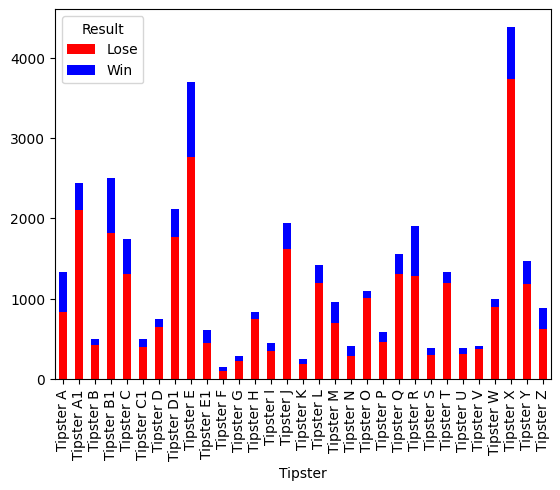

In [ ]:
cross_tab = pd.crosstab(data['Tipster'], data['Result'], margins=True)
cross_tab.iloc[:-1,:-1].plot(kind='bar', stacked=True, color=['red', 'blue'], grid=False)

**2.3 Xử lý dữ liệu**

In [ ]:
# Xoá các cột không cần thiết
del data['UID']
del data['Date']

# Xóa các cột chỉ chứa 1 giá trị
data.drop(columns=data.columns[data.nunique()==1], inplace=True)

# Xóa các hàng trùng lặp
data.drop_duplicates(inplace=True)
data

,ID,Tipster,Track,Horse,Bet Type,Odds,Result,TipsterActive
0,1,Tipster A,Ascot,Fredricka,Win,8.00,Lose,True
1,2,Tipster A,Thirsk,Spend A Penny,Win,4.50,Lose,True
2,3,Tipster A,York,Straightothepoint,Win,7.00,Lose,True
3,4,Tipster A,Newmarket,Miss Inga Sock,Win,5.00,Lose,True
4,5,Tipster A,Ascot,Peril,Win,4.33,Win,True
...,...,...,...,...,...,...,...,...
38243,605,Tipster E1,Kempton,Solar Flair,Win,7.00,Lose,False
38244,606,Tipster E1,Doncaster,Express Himself,Each Way,12.00,Lose,False
38245,607,Tipster E1,Doncaster,Jack Dexter,Win,7.00,Lose,False
38246,608,Tipster E1,Kelso,Just Cameron,Win,4.33,Lose,False


In [ ]:
# transfrom dữ liệu
le = LabelEncoder() 

data['Tipster']= le.fit_transform(data['Tipster']) 
data['Track']= le.fit_transform(data['Track']) 
data['Horse']= le.fit_transform(data['Horse']) 
data['Bet Type']= le.fit_transform(data['Bet Type']) 
data['Result']= le.fit_transform(data['Result']) 
data['TipsterActive']= le.fit_transform(data['TipsterActive']) 

data

,ID,Tipster,Track,Horse,Bet Type,Odds,Result,TipsterActive
0,1,0,2,5158,1,8.00,0,1
1,2,0,96,13108,1,4.50,0,1
2,3,0,114,13411,1,7.00,0,1
3,4,0,74,8976,1,5.00,0,1
4,5,0,2,10554,1,4.33,1,1
...,...,...,...,...,...,...,...,...
38243,605,9,54,12946,1,7.00,0,0
38244,606,9,26,4591,0,12.00,0,0
38245,607,9,26,6824,1,7.00,0,0
38246,608,9,53,7068,1,4.33,0,0


**Vẽ biểu đồ thể hiện sự phân bố của dữ liệu**

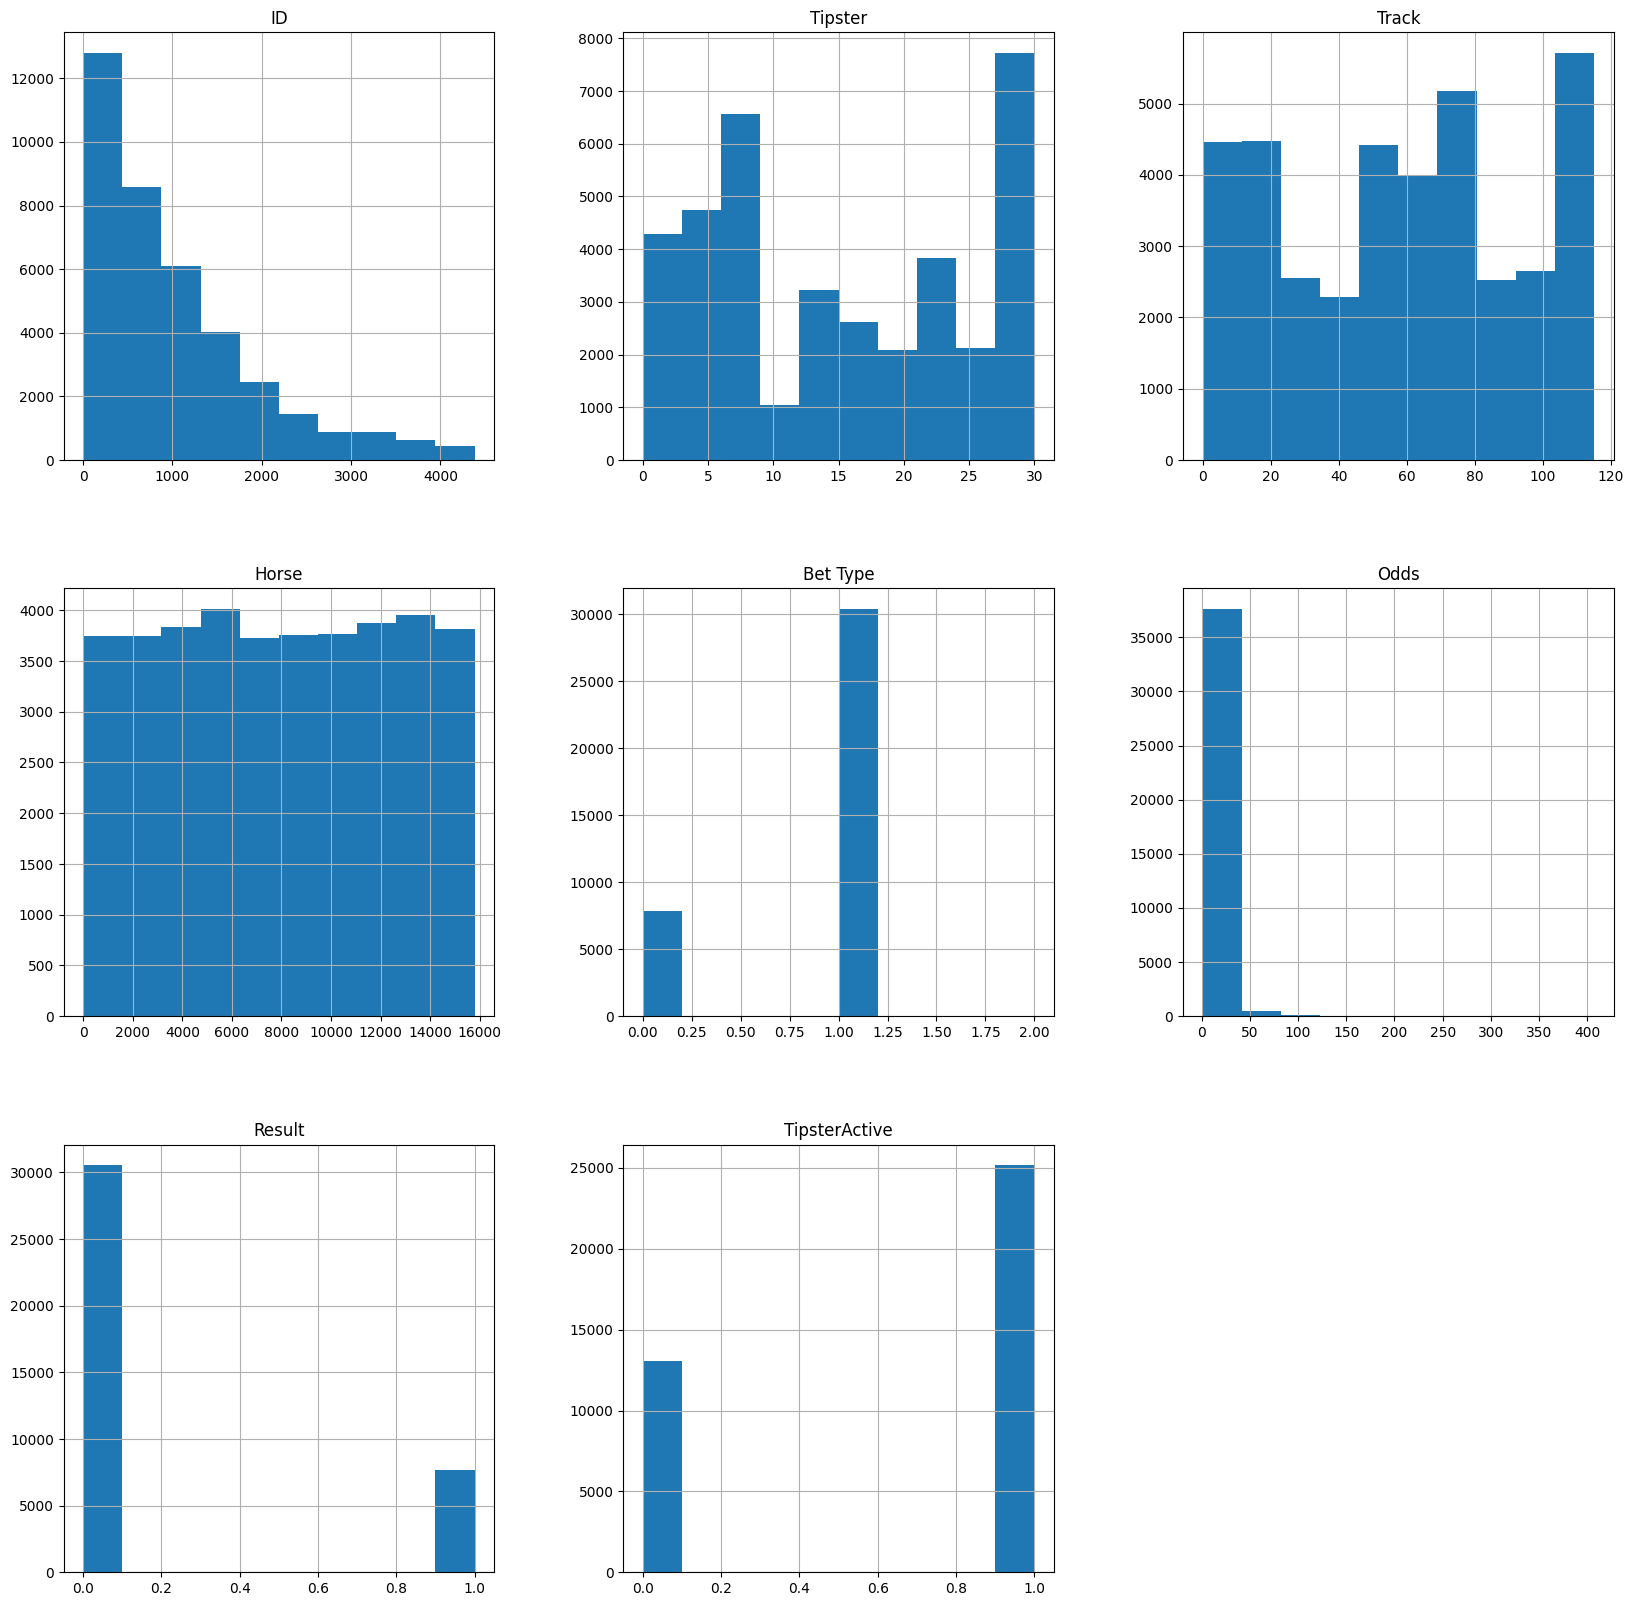

In [ ]:
data.iloc[:,:].hist(figsize=(20,20))
plt.show()

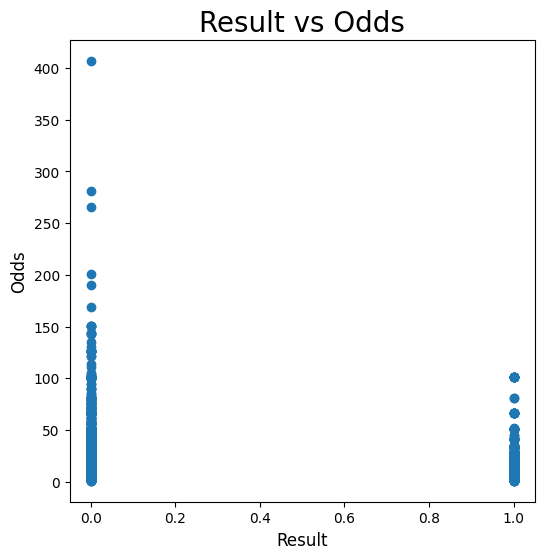

In [ ]:
fig,ax = plt.subplots(figsize=(6,6))
ax.set_title('Result vs Odds',fontsize=20)
ax.set_ylabel('Odds',fontsize=12)
ax.set_xlabel('Result',fontsize=12)
ax.scatter(data['Result'],data['Odds'])

**3. Huấn luyện mô hình và đánh giá**

In [ ]:
# tách dữ liệu
tagert = ['Result']

Y = data[tagert]
X = data.drop(tagert,axis=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
y_train = y_train.values.ravel()
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


def build_and_eval_model(clf):
    model = clf
   # Đánh giá mô hình bằng Kiểm chứng chéo trên Training Set
    scoring = ['accuracy', 'precision', 'recall', 'f1']
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=0)
    scores = cross_validate(model, X_train, y_train, scoring=scoring, cv=cv, n_jobs=-1, error_score='raise')
    cv_scores = pd.DataFrame(scores).iloc[:, 2:]
    print('A. Cross Validation on Training Set')
    print(cv_scores.describe())

    # Huấn luyện mô hình
    model.fit(X_train, y_train)

    # Dùng mô hình dự đoán trên Test Set
    y_pred = model.predict(X_test)

    # Đánh giá kết quả dự đoán của mô hình trên Test Set
    final_scores = pd.DataFrame({'accuracy': [accuracy_score(y_test, y_pred)],
                                 'precision': [precision_score(y_test, y_pred, average='macro',zero_division=0)],
                                 'recall': [recall_score(y_test, y_pred, average='macro')],
                                 'f1': [f1_score(y_test, y_pred, average='macro')]})
    print('B. Final Validation on Test Set')
    print(final_scores.to_string(index=False))

    # Trực quan hóa kết quả đánh giá
    fig, axs = plt.subplots(1,2, figsize=(12,4))
    sns.boxplot(data=cv_scores, orient="h", palette="Set2", ax=axs[0])
    ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap=plt.cm.Blues, ax=axs[1])
    plt.show()
    # Lưu kết quả đánh giá
    cv_scores.to_csv('data/{}_cv_scores.csv'.format(clf.__class__.__name__), index=False)
    final_scores.to_csv('data/{}_final_scores.csv'.format(clf.__class__.__name__), index=False)

  

(26773, 7) (11475, 7) (26773,) (11475, 1)


In [ ]:
#Giảm bớt dữ liệu
X=X.iloc[:5000,:]
Y=Y.iloc[:5000,:]

BUILD AND EVALUATE SVM MODEL
A. Cross Validation on Training Set
       test_accuracy  test_precision  test_recall    test_f1
count      15.000000       15.000000    15.000000  15.000000
mean        0.733333        0.411409     0.059472   0.103472
std         0.005363        0.055445     0.009357   0.014033
min         0.724286        0.333333     0.043956   0.078431
25%         0.729286        0.371711     0.054945   0.096618
50%         0.732857        0.391304     0.060440   0.102326
75%         0.737857        0.466403     0.063354   0.110001
max         0.741429        0.500000     0.077348   0.127854
B. Final Validation on Test Set
 accuracy  precision  recall       f1
    0.726   0.558322 0.51228 0.471414


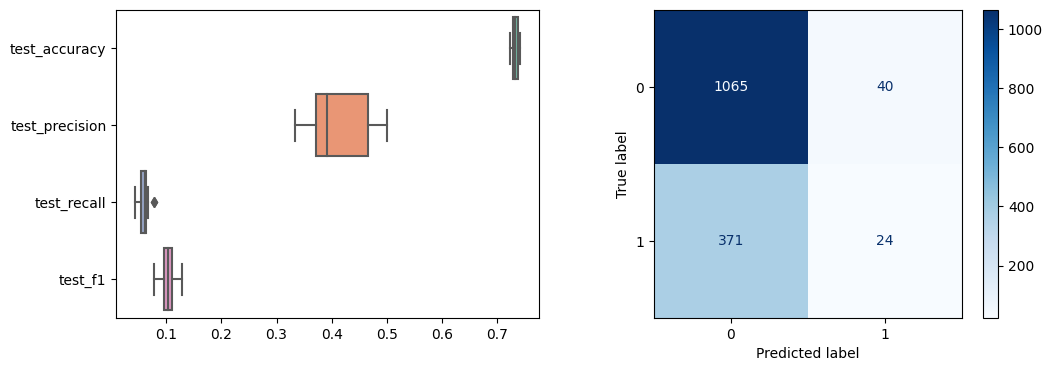

In [ ]:
from sklearn.svm import SVC
print('BUILD AND EVALUATE SVM MODEL')
clf = SVC(C=10,kernel ='linear')
build_and_eval_model(clf)

A. Cross Validation on Training Set
       test_accuracy  test_precision  test_recall    test_f1
count      15.000000       15.000000    15.000000  15.000000
mean        0.752574        0.314835     0.183471   0.231662
std         0.004858        0.012535     0.008460   0.007724
min         0.746218        0.298413     0.169881   0.217519
25%         0.748623        0.303164     0.177686   0.227225
50%         0.752148        0.315182     0.185491   0.231555
75%         0.754995        0.318414     0.189164   0.237374
max         0.762981        0.340067     0.195592   0.243931
B. Final Validation on Test Set
 accuracy  precision   recall       f1
 0.762702   0.571926 0.547893 0.551342


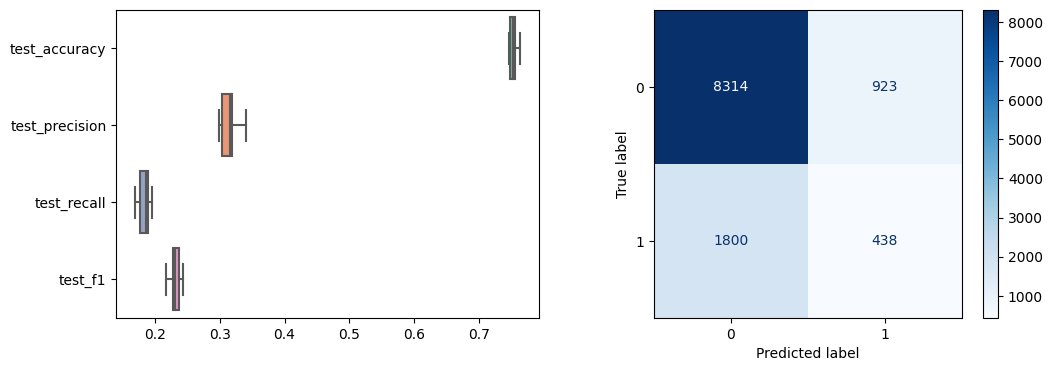

In [ ]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(min_samples_leaf=10,min_samples_split=17,random_state=1)
build_and_eval_model(clf)

A. Cross Validation on Training Set
       test_accuracy  test_precision  test_recall    test_f1
count      15.000000       15.000000    15.000000  15.000000
mean        0.492997        0.211886     0.548822   0.305723
std         0.008088        0.004707     0.010600   0.006252
min         0.482540        0.204912     0.528926   0.296068
25%         0.487582        0.209003     0.539486   0.302668
50%         0.489167        0.211633     0.550046   0.305213
75%         0.500327        0.215572     0.557392   0.309744
max         0.506069        0.219942     0.563820   0.316007
B. Final Validation on Test Set
 accuracy  precision   recall       f1
 0.495338   0.509577 0.515217 0.451853


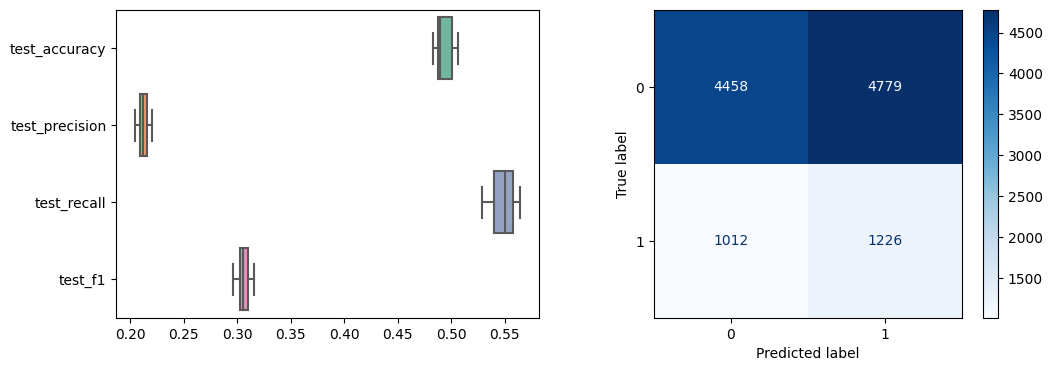

In [ ]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
build_and_eval_model(clf)

BUILD AND EVALUATE RANDOM FOREST MODEL
A. Cross Validation on Training Set
       test_accuracy  test_precision  test_recall    test_f1
count      15.000000       15.000000    15.000000  15.000000
mean        0.797620        0.605866     0.015121   0.029485
std         0.000904        0.095810     0.002325   0.004467
min         0.796078        0.440000     0.010101   0.019749
25%         0.796919        0.522727     0.013774   0.026870
50%         0.797721        0.615385     0.014692   0.028803
75%         0.798300        0.680000     0.016988   0.032902
max         0.799066        0.727273     0.019284   0.037567
B. Final Validation on Test Set
 accuracy  precision   recall       f1
 0.805316   0.671176 0.505295 0.459001


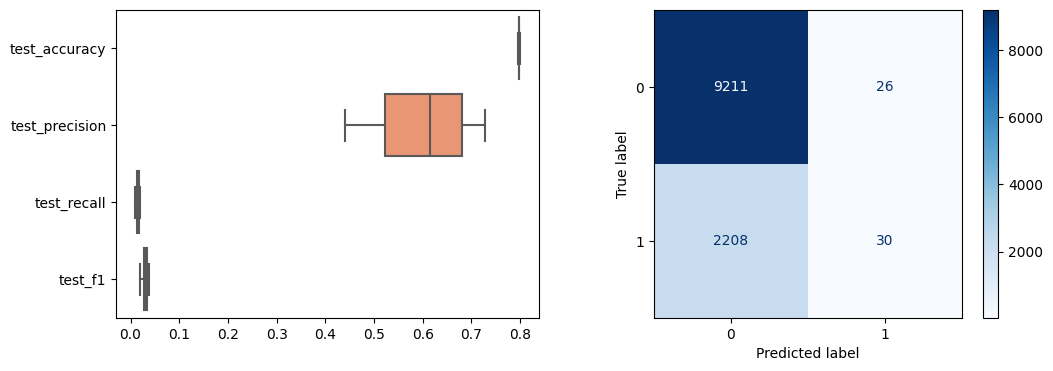

In [ ]:
from sklearn.ensemble import RandomForestClassifier
print('BUILD AND EVALUATE RANDOM FOREST MODEL')
clf = RandomForestClassifier(random_state=0,max_depth=3,max_features=None,max_leaf_nodes=9,n_estimators=25)
build_and_eval_model(clf)

A. Cross Validation on Training Set
       test_accuracy  test_precision  test_recall    test_f1
count      15.000000       15.000000    15.000000  15.000000
mean        0.792154        0.211877     0.007836   0.015094
std         0.001397        0.050751     0.001990   0.003796
min         0.790064        0.130435     0.004591   0.008993
25%         0.790830        0.160580     0.006428   0.012341
50%         0.792344        0.234043     0.008264   0.015789
75%         0.793258        0.253205     0.009183   0.017715
max         0.794173        0.272727     0.011938   0.022847
B. Final Validation on Test Set
 accuracy  precision   recall      f1
 0.800784   0.513047 0.500618 0.45276


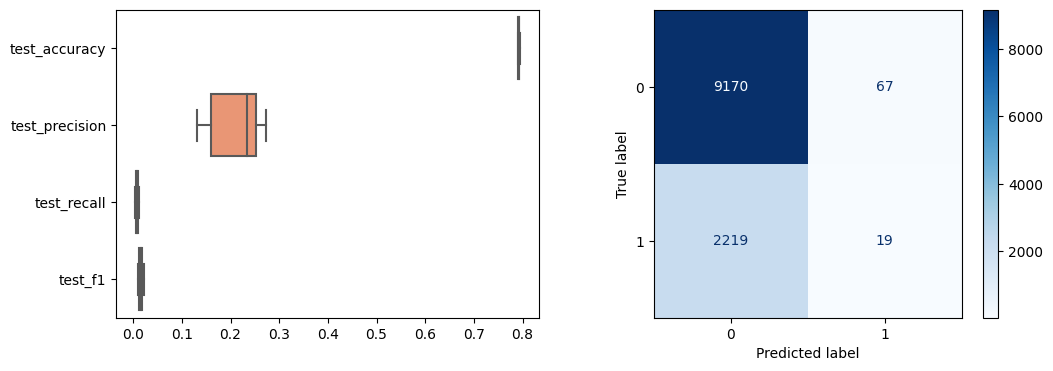

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=10)
build_and_eval_model(clf)

A. Cross Validation on Training Set
       test_accuracy  test_precision  test_recall    test_f1
count      15.000000        15.00000    15.000000  15.000000
mean        0.796487         0.10000     0.000184   0.000367
std         0.000231         0.20702     0.000380   0.000759
min         0.795854         0.00000     0.000000   0.000000
25%         0.796452         0.00000     0.000000   0.000000
50%         0.796601         0.00000     0.000000   0.000000
75%         0.796639         0.00000     0.000000   0.000000
max         0.796639         0.50000     0.000918   0.001833


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


B. Final Validation on Test Set
 accuracy  precision  recall       f1
 0.804967   0.402484     0.5 0.445973


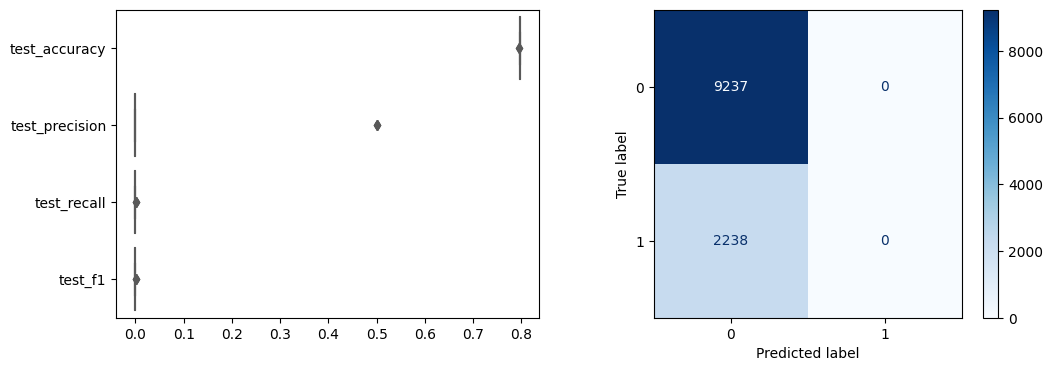

In [ ]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier( alpha=1e-5,
hidden_layer_sizes=(120,80,40),activation='tanh',solver='adam', random_state=1,max_iter=100)

build_and_eval_model(clf)

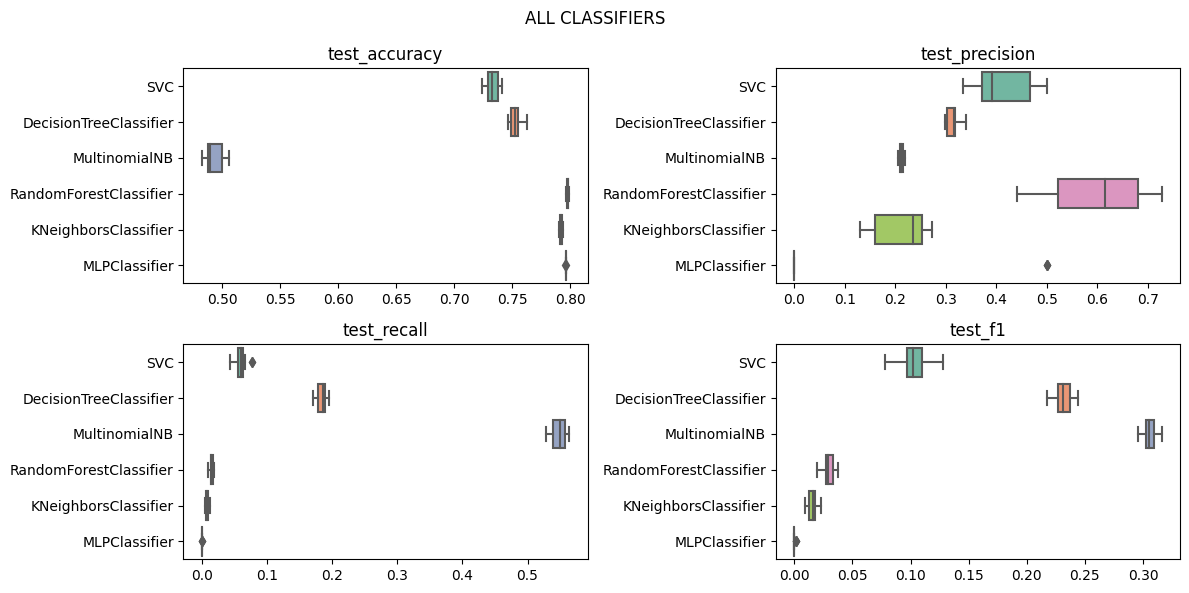

In [ ]:
clf_names = ['SVC', 'DecisionTreeClassifier', 'MultinomialNB',
            'RandomForestClassifier', 'KNeighborsClassifier','MLPClassifier']
score_names = ['test_accuracy', 'test_precision', 'test_recall', 'test_f1']

def build_plots(title):
    model_cv_scores = {clf_name: pd.read_csv('data/{}_cv_scores.csv'.format(clf_name)) for clf_name in clf_names}

    fig, axs = plt.subplots(2,2, figsize=(12,6))

    for score_name, ax in zip(score_names, axs.flat):
        score_data = pd.DataFrame({clf_name: model_cv_scores[clf_name][score_name] for clf_name in clf_names})
        sns.boxplot(data=score_data, orient="h", palette="Set2", ax=ax)
        ax.set_title(score_name)
    
    fig.suptitle(title)
    plt.tight_layout()

build_plots('ALL CLASSIFIERS')

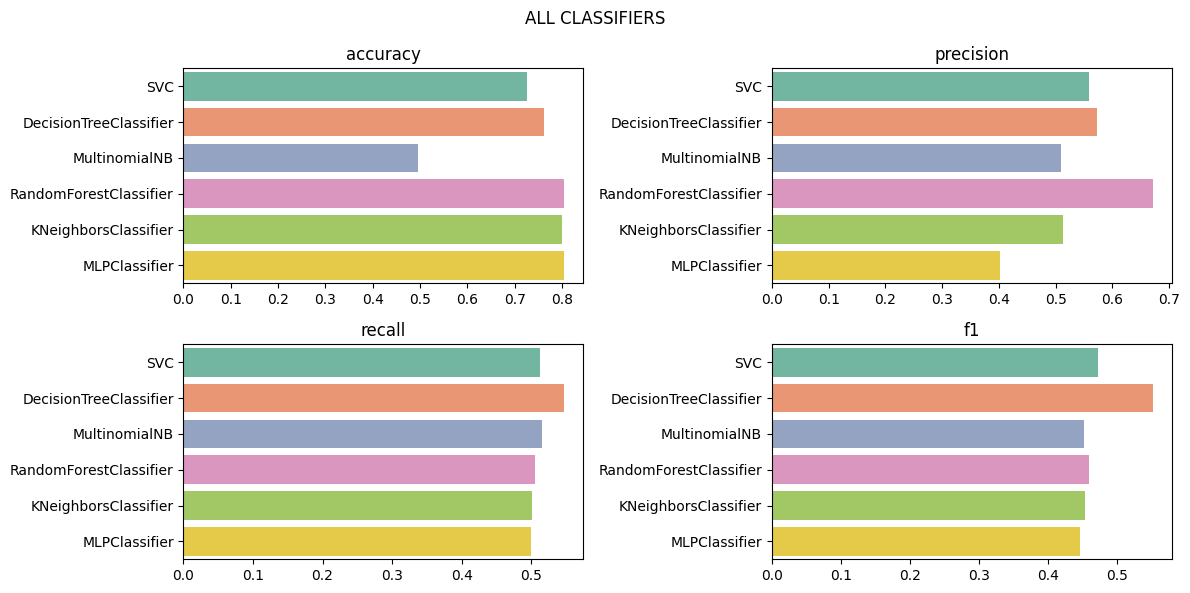

In [3]:
clf_names = ['SVC', 'DecisionTreeClassifier', 'MultinomialNB',
            'RandomForestClassifier', 'KNeighborsClassifier','MLPClassifier']
score_names = ['accuracy', 'precision', 'recall', 'f1']

def build_plots(title):
    model_cv_scores = {clf_name: pd.read_csv('data/{}_final_scores.csv'.format(clf_name)) for clf_name in clf_names}

    fig, axs = plt.subplots(2,2, figsize=(12,6))

    for score_name, ax in zip(score_names, axs.flat):
        score_data = pd.DataFrame({clf_name: model_cv_scores[clf_name][score_name] for clf_name in clf_names})
        sns.barplot(data=score_data, orient="h", palette="Set2", ax=ax)
        ax.set_title(score_name)
    
    fig.suptitle(title)
    plt.tight_layout()

build_plots('ALL CLASSIFIERS')